In [ ]:
# we import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()

#here data.data gives 150 X 4 matrix of 150 examples sepal length, sepal width, petal length and petal width
#data.target gives output type of flower
# class 0 = setosa
# class 1 = versicolor 
# class 2 = virginica

# now we will amke dataframe and divide data in 80:20 for training and testing purpose
df = pd.DataFrame(data.data,columns=data.feature_names)
df['CLASS-OUTPUT'] = data.target  # adding output class to last column of data-set
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),CLASS-OUTPUT
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


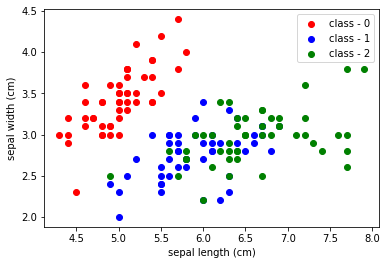

In [ ]:
x = data.data
y = data.target

plt.scatter(x[0:50,0], x[0:50,1], color = 'red', label="class - 0")
plt.scatter(x[51:100,0], x[51:100,1], color = 'blue', label="class - 1")
plt.scatter(x[101:150,0], x[101:150,1], color = 'green', label="class - 2")
plt.legend()
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()

In [ ]:
#x = np.array(x)
x1 = x[0:100, :2]
y1 = y[0:100]

x2 = x[50:150, :2]
y2 = y[50:150]

x3 = np.concatenate((x[0:50, 0:2], x[100:150, 0:2]))
y3 = np.concatenate((y[0:50], y[100:150]))

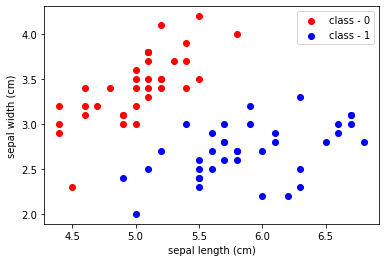

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=7)

for i in range(0, x_train.shape[0]):
  if y_train[i] == 0:
    plt.scatter(x_train[i,0], x_train[i,1], color = 'red')
  elif y_train[i] == 1:
    plt.scatter(x_train[i,0], x_train[i,1], color = 'blue')
  else:
    plt.scatter(x_train[i,0], x_train[i,1], color = 'green')

for i in range(0, x_train.shape[0]):
  if y_train[i] == 0:
    plt.scatter(x_train[i,0], x_train[i,1], color = 'red', label="class - 0")
    break

for i in range(0, x_train.shape[0]):
  if y_train[i] == 1:
    plt.scatter(x_train[i,0], x_train[i,1], color = 'blue', label="class - 1")
    break

plt.legend()
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()

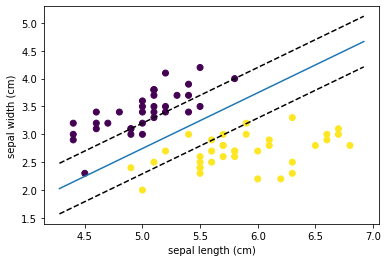

In [ ]:
from sklearn.svm import SVC

model1 = SVC(kernel='linear', C=1)
ak1 = model1.fit(x_train, y_train)
y_pred=ak1.predict(x_test)

plt.scatter(x_train[:, 0],x_train[:, 1], c = y_train);
a = plt.gca()
xlim = a.get_xlim()
xx = np.linspace(xlim[0], xlim[1])

w = ak1.coef_[0]
yy = (-w[0] * xx - (ak1.intercept_[0])) / w[1]

plt.plot(xx, yy)

const = 1 / np.sqrt(np.sum(ak1.coef_ ** 2))
y_up = yy + np.sqrt(1 + (w[0] / w[1]) ** 2) * const
y_down = yy - np.sqrt(1 + (w[0] / w[1]) ** 2) * const

plt.plot(xx, y_up, 'k--')
plt.plot(xx, y_down, 'k--')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



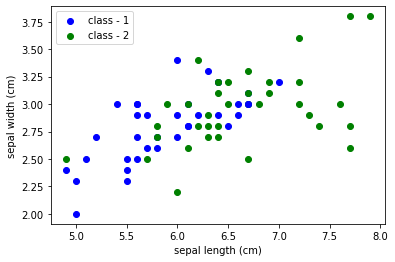

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.3, random_state=7)

for i in range(0, x_train.shape[0]):
  if y_train[i] == 0:
    plt.scatter(x_train[i,0], x_train[i,1], color = 'red')
  elif y_train[i] == 1:
    plt.scatter(x_train[i,0], x_train[i,1], color = 'blue')
  else:
    plt.scatter(x_train[i,0], x_train[i,1], color = 'green')

for i in range(0, x_train.shape[0]):
  if y_train[i] == 1:
    plt.scatter(x_train[i,0], x_train[i,1], color = 'blue', label="class - 1")
    break

for i in range(0, x_train.shape[0]):
  if y_train[i] == 2:
    plt.scatter(x_train[i,0], x_train[i,1], color = 'green', label="class - 2")
    break

plt.legend()
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()

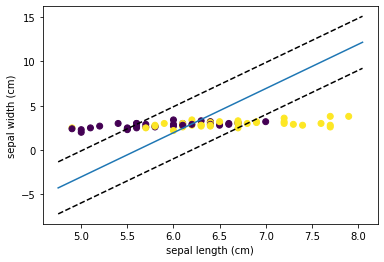

In [ ]:
model1 = SVC(kernel='linear', C=1)
ak1 = model1.fit(x_train, y_train)
y_pred=ak1.predict(x_test)

plt.scatter(x_train[:, 0],x_train[:, 1], c = y_train);
a = plt.gca()
xlim = a.get_xlim()
xx = np.linspace(xlim[0], xlim[1])

w = ak1.coef_[0]
yy = (-w[0] * xx - (ak1.intercept_[0])) / w[1]

plt.plot(xx, yy)

const = 1 / np.sqrt(np.sum(ak1.coef_ ** 2))
y_up = yy + np.sqrt(1 + (w[0] / w[1]) ** 2) * const
y_down = yy - np.sqrt(1 + (w[0] / w[1]) ** 2) * const

plt.plot(xx, y_up, 'k--')
plt.plot(xx, y_down, 'k--')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.77      0.62      0.69        16
           2       0.65      0.79      0.71        14

    accuracy                           0.70        30
   macro avg       0.71      0.71      0.70        30
weighted avg       0.71      0.70      0.70        30



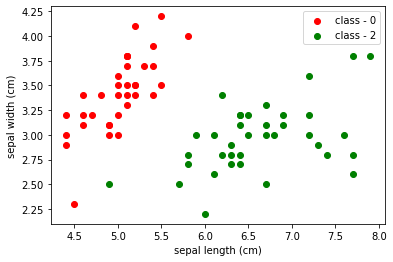

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x3, y3, test_size=0.3, random_state=7)

for i in range(0, x_train.shape[0]):
  if y_train[i] == 0:
    plt.scatter(x_train[i,0], x_train[i,1], color = 'red')
  elif y_train[i] == 1:
    plt.scatter(x_train[i,0], x_train[i,1], color = 'blue')
  else:
    plt.scatter(x_train[i,0], x_train[i,1], color = 'green')

for i in range(0, x_train.shape[0]):
  if y_train[i] == 0:
    plt.scatter(x_train[i,0], x_train[i,1], color = 'red', label="class - 0")
    break

for i in range(0, x_train.shape[0]):
  if y_train[i] == 2:
    plt.scatter(x_train[i,0], x_train[i,1], color = 'green', label="class - 2")
    break

plt.legend()
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()

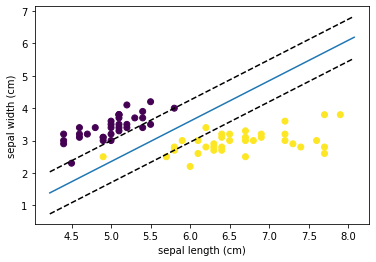

In [ ]:
model1 = SVC(kernel='linear', C=1)
ak1 = model1.fit(x_train, y_train)
y_pred=ak1.predict(x_test)

plt.scatter(x_train[:, 0],x_train[:, 1], c = y_train);
a = plt.gca()
xlim = a.get_xlim()
xx = np.linspace(xlim[0], xlim[1])

w = ak1.coef_[0]
yy = (-w[0] * xx - (ak1.intercept_[0])) / w[1]

plt.plot(xx, yy)

const = 1 / np.sqrt(np.sum(ak1.coef_ ** 2))
y_up = yy + np.sqrt(1 + (w[0] / w[1]) ** 2) * const
y_down = yy - np.sqrt(1 + (w[0] / w[1]) ** 2) * const

plt.plot(xx, y_up, 'k--')
plt.plot(xx, y_down, 'k--')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
x = data.data
y = data.target

x_train, x_test, y_train, y_test = train_test_split(x[:, 0:2], y, test_size=0.3, random_state=7)

model1 = SVC(kernel='linear', C=0.001)
ak1 = model1.fit(x_train, y_train)
y_pred=ak1.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.27      1.00      0.42        12
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        17

    accuracy                           0.27        45
   macro avg       0.09      0.33      0.14        45
weighted avg       0.07      0.27      0.11        45



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
x = data.data
y = data.target

x_train, x_test, y_train, y_test = train_test_split(x[:, 0:2], y, test_size=0.3, random_state=7)

model1 = SVC(kernel='linear', C=1000)
ak1 = model1.fit(x_train, y_train)
y_pred=ak1.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.56      0.56      0.56        16
           2       0.61      0.65      0.63        17

    accuracy                           0.69        45
   macro avg       0.72      0.71      0.72        45
weighted avg       0.70      0.69      0.69        45



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=7)

model1 = SVC(kernel='rbf', C=1)
ak1 = model1.fit(x_train, y_train)
y_pred=ak1.predict(x_test)

print(metrics.classification_report(y_test, y_pred))


x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.3, random_state=7)

model1 = SVC(kernel='rbf', C=1)
ak1 = model1.fit(x_train, y_train)
y_pred=ak1.predict(x_test)

print(metrics.classification_report(y_test, y_pred))


x_train, x_test, y_train, y_test = train_test_split(x3, y3, test_size=0.3, random_state=7)

model1 = SVC(kernel='rbf', C=1)
ak1 = model1.fit(x_train, y_train)
y_pred=ak1.predict(x_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           1       0.79      0.69      0.73        16
           2       0.69      0.79      0.73        14

    accuracy                           0.73        30
   macro avg       0.74      0.74      0.73        30
weighted avg       0.74      0.73      0.73        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=7)

model1 = SVC(kernel='rbf', C=1000)
ak1 = model1.fit(x_train, y_train)
y_pred=ak1.predict(x_test)

print(metrics.classification_report(y_test, y_pred))


x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.3, random_state=7)

model1 = SVC(kernel='rbf', C=1000)
ak1 = model1.fit(x_train, y_train)
y_pred=ak1.predict(x_test)

print(metrics.classification_report(y_test, y_pred))


x_train, x_test, y_train, y_test = train_test_split(x3, y3, test_size=0.3, random_state=7)

model1 = SVC(kernel='rbf', C=1000)
ak1 = model1.fit(x_train, y_train)
y_pred=ak1.predict(x_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           1       0.75      0.56      0.64        16
           2       0.61      0.79      0.69        14

    accuracy                           0.67        30
   macro avg       0.68      0.67      0.67        30
weighted avg       0.69      0.67      0.66        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=7)

model1 = SVC(kernel='rbf', C=0.001)
ak1 = model1.fit(x_train, y_train)
y_pred=ak1.predict(x_test)

print(metrics.classification_report(y_test, y_pred))


x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.3, random_state=7)

model1 = SVC(kernel='rbf', C=0.001)
ak1 = model1.fit(x_train, y_train)
y_pred=ak1.predict(x_test)

print(metrics.classification_report(y_test, y_pred))


x_train, x_test, y_train, y_test = train_test_split(x3, y3, test_size=0.3, random_state=7)

model1 = SVC(kernel='rbf', C=0.001)
ak1 = model1.fit(x_train, y_train)
y_pred=ak1.predict(x_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.47      1.00      0.64        14

    accuracy                           0.47        30
   macro avg       0.23      0.50      0.32        30
weighted avg       0.22      0.47      0.30        30

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.47      1.00      0.64        14

    accuracy                           0.47        30
   macro avg       0.23      0.50      0.32        30
weighted avg       0.22      0.47      0.30        30

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           2       0.47      1.00      0.64        14

    accuracy                           0.47        30
   macro avg       0.23      0.50      0.32        30
weighted avg       0.22      0.47      0.30        30



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


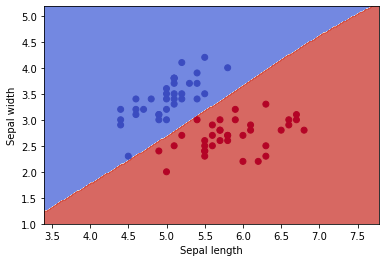

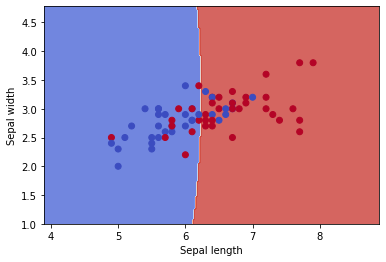

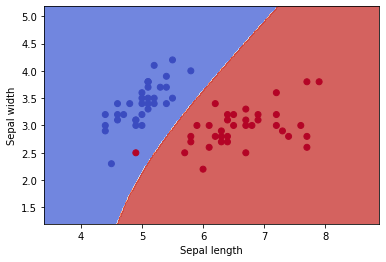

In [107]:
#This code was made with the help from https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=7)

model1 = SVC(kernel='rbf', C=1)
ak1 = model1.fit(x_train, y_train)
y_pred=ak1.predict(x_test)

step = 0.02

x_min = x_train[:, 0].min() - 1
x_max = x_train[:, 0].max() + 1
y_min = x_train[:, 1].min() - 1
y_max = x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

z = ak1.predict(np.c_[xx.ravel(), yy.ravel()])

z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

#-------------------------------------------------------------------------------------------

x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.3, random_state=7)

model1 = SVC(kernel='rbf', C=1)
ak1 = model1.fit(x_train, y_train)
y_pred=ak1.predict(x_test)

step = 0.02

x_min = x_train[:, 0].min() - 1
x_max = x_train[:, 0].max() + 1
y_min = x_train[:, 1].min() - 1
y_max = x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

z = ak1.predict(np.c_[xx.ravel(), yy.ravel()])

z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

#------------------------------------------------------------------------------------------

x_train, x_test, y_train, y_test = train_test_split(x3, y3, test_size=0.3, random_state=7)

model1 = SVC(kernel='rbf', C=1)
ak1 = model1.fit(x_train, y_train)
y_pred=ak1.predict(x_test)

step = 0.02

x_min = x_train[:, 0].min() - 1
x_max = x_train[:, 0].max() + 1
y_min = x_train[:, 1].min() - 1
y_max = x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

z = ak1.predict(np.c_[xx.ravel(), yy.ravel()])

z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

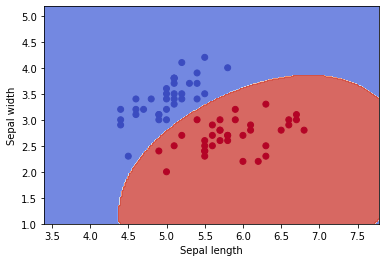

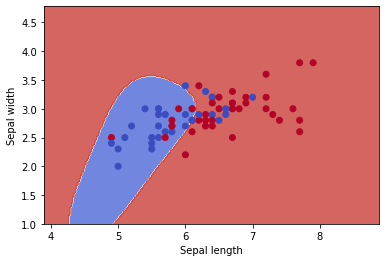

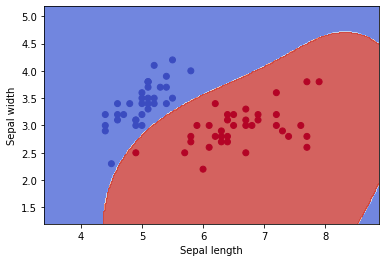

In [108]:
#This code was made with the help from https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=7)

model1 = SVC(kernel='rbf', C=1000)
ak1 = model1.fit(x_train, y_train)
y_pred=ak1.predict(x_test)

step = 0.02

x_min = x_train[:, 0].min() - 1
x_max = x_train[:, 0].max() + 1
y_min = x_train[:, 1].min() - 1
y_max = x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

z = ak1.predict(np.c_[xx.ravel(), yy.ravel()])

z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

#-------------------------------------------------------------------------------------------

x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.3, random_state=7)

model1 = SVC(kernel='rbf', C=1000)
ak1 = model1.fit(x_train, y_train)
y_pred=ak1.predict(x_test)

step = 0.02

x_min = x_train[:, 0].min() - 1
x_max = x_train[:, 0].max() + 1
y_min = x_train[:, 1].min() - 1
y_max = x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

z = ak1.predict(np.c_[xx.ravel(), yy.ravel()])

z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

#------------------------------------------------------------------------------------------

x_train, x_test, y_train, y_test = train_test_split(x3, y3, test_size=0.3, random_state=7)

model1 = SVC(kernel='rbf', C=1000)
ak1 = model1.fit(x_train, y_train)
y_pred=ak1.predict(x_test)

step = 0.02

x_min = x_train[:, 0].min() - 1
x_max = x_train[:, 0].max() + 1
y_min = x_train[:, 1].min() - 1
y_max = x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

z = ak1.predict(np.c_[xx.ravel(), yy.ravel()])

z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

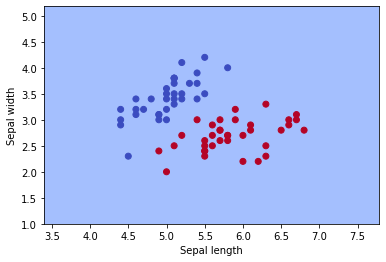

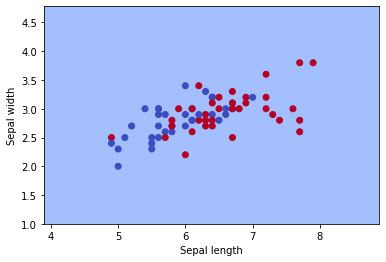

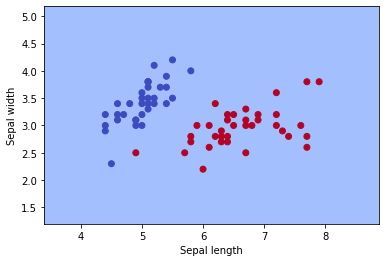

In [109]:
#This code was made with the help from https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=7)

model1 = SVC(kernel='rbf', C=0.001)
ak1 = model1.fit(x_train, y_train)
y_pred=ak1.predict(x_test)

step = 0.02

x_min = x_train[:, 0].min() - 1
x_max = x_train[:, 0].max() + 1
y_min = x_train[:, 1].min() - 1
y_max = x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

z = ak1.predict(np.c_[xx.ravel(), yy.ravel()])

z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

#-------------------------------------------------------------------------------------------

x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.3, random_state=7)

model1 = SVC(kernel='rbf', C=0.001)
ak1 = model1.fit(x_train, y_train)
y_pred=ak1.predict(x_test)

step = 0.02

x_min = x_train[:, 0].min() - 1
x_max = x_train[:, 0].max() + 1
y_min = x_train[:, 1].min() - 1
y_max = x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

z = ak1.predict(np.c_[xx.ravel(), yy.ravel()])

z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

#------------------------------------------------------------------------------------------

x_train, x_test, y_train, y_test = train_test_split(x3, y3, test_size=0.3, random_state=7)

model1 = SVC(kernel='rbf', C=0.001)
ak1 = model1.fit(x_train, y_train)
y_pred=ak1.predict(x_test)

step = 0.02

x_min = x_train[:, 0].min() - 1
x_max = x_train[:, 0].max() + 1
y_min = x_train[:, 1].min() - 1
y_max = x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

z = ak1.predict(np.c_[xx.ravel(), yy.ravel()])

z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()